In [15]:
# Import necessary libraries
import yfinance
import math                 # For mathematical operations
import numpy as np          # For numerical operations
import pandas as pd         # For data manipulation and analysis
import seaborn as sns       # For data visualization
sns.set_style('whitegrid')  # Set seaborn style to whitegrid
import matplotlib.pyplot as plt  # For plotting graphs
plt.style.use("fivethirtyeight")  # Use 'fivethirtyeight' style for matplotlib plots

# Importing Keras libraries for building neural network models
import keras
from keras.models import Sequential  # For sequential model building
from keras.callbacks import EarlyStopping  # For early stopping during model training
from keras.layers import Dense, LSTM, Dropout  # For adding layers to neural network model

# Importing Scikit-learn libraries for data preprocessing and model evaluation
from sklearn.preprocessing import MinMaxScaler  # For data normalization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For model evaluation

import warnings   # For handling warnings
warnings.simplefilter('ignore')   # Ignore warnings for cleaner output

In [18]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Bitcoin
ticker_symbol = "BTC-USD"

# Fetch data
btc_data = yf.download(ticker_symbol, period="max", interval="1d")

# Display the first few rows of the dataframe
btc_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [19]:
btc_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-13,67188.375000,67931.429688,60919.105469,63821.472656,63821.472656,52869738185
2024-04-14,63836.230469,65824.429688,62205.851562,65738.726562,65738.726562,49084320047
2024-04-15,65739.648438,66878.648438,62332.070312,63426.210938,63426.210938,43595917654
2024-04-16,63419.296875,64355.667969,61716.402344,63811.863281,63811.863281,42847528078
2024-04-17,63826.062500,64442.621094,60090.425781,61569.156250,61569.156250,41830633472


In [21]:
# Get the dimensions of the DataFrame
btc_data.shape

(3501, 6)

In [23]:
btc_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [24]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3501 entries, 2014-09-17 to 2024-04-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3501 non-null   float64
 1   High       3501 non-null   float64
 2   Low        3501 non-null   float64
 3   Close      3501 non-null   float64
 4   Adj Close  3501 non-null   float64
 5   Volume     3501 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 191.5 KB


In [25]:
# Generate descriptive statistics of the DataFrame
# Transpose the result for better readability
btc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3501.0,1.583606e+04,1.755565e+04,1.768970e+02,1.006210e+03,8.661761e+03,2.673758e+04,7.307938e+04
High,3501.0,1.620661e+04,1.797768e+04,2.117310e+02,1.033870e+03,8.836190e+03,2.709270e+04,7.375007e+04
Low,3501.0,1.543959e+04,1.708785e+04,1.715100e+02,9.828300e+02,8.394460e+03,2.633931e+04,7.133409e+04
Close,3501.0,1.585226e+04,1.756825e+04,1.781030e+02,1.007480e+03,8.660700e+03,2.675428e+04,7.308350e+04
Adj Close,3501.0,1.585226e+04,1.756825e+04,1.781030e+02,1.007480e+03,8.660700e+03,2.675428e+04,7.308350e+04
Volume,3501.0,1.710932e+10,1.928781e+10,5.914570e+06,2.079820e+08,1.275080e+10,2.759567e+10,3.509679e+11


In [27]:
# Check for missing values in each column of the DataFrame
btc_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
btc_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Data Anlysis

## Opening price BTC

In [31]:
# a. Check for average opening price
print("a. Average opening price:", btc_data['Open'].mean())

# b. Check for highest opening price
print("b. Highest opening price:", btc_data['Open'].max())

# c. Check for lowest opening price
print("c. Lowest opening price:", btc_data['Open'].min())

# d. Check for outliers in the opening price
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = btc_data['Open'].quantile(0.25)
Q3 = btc_data['Open'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = btc_data[(btc_data['Open'] < lower_bound) | (btc_data['Open'] > upper_bound)]['Open']

print("d. Outliers in opening price:")
# Check if any outliers are found
if len(outliers) == 0:
    print("   No outliers found.")
else:
    # Print the count of outliers
    print(outliers.count())

a. Average opening price: 15836.057482983377
b. Highest opening price: 73079.375
c. Lowest opening price: 176.89700317382812
d. Outliers in opening price:
40


e. Histogram of opening price over time:


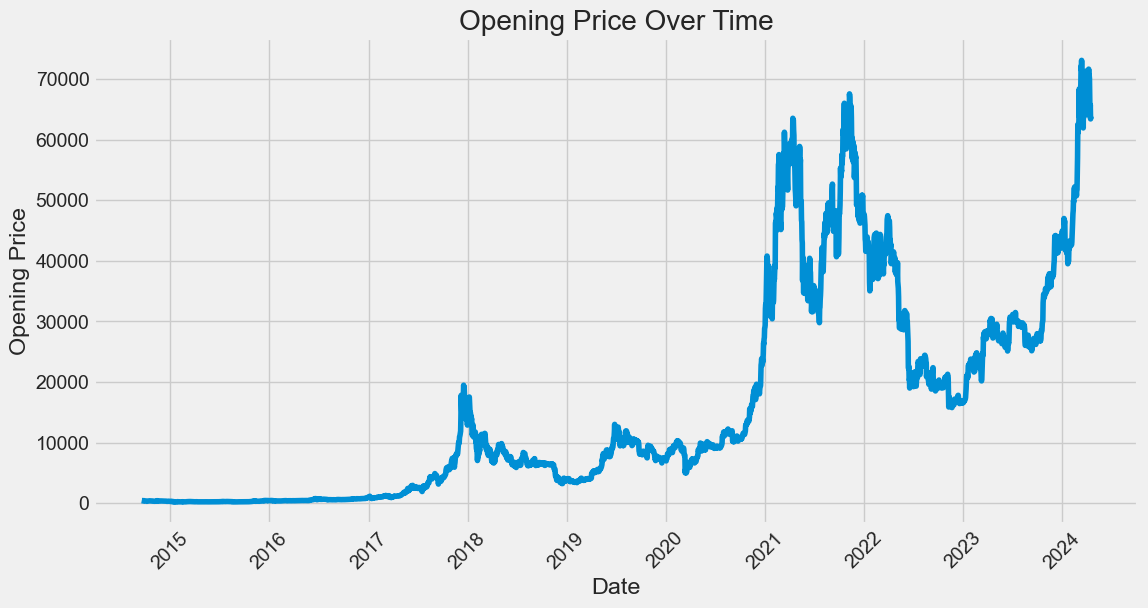

In [33]:
# e. Histogram of opening price over time
print("e. Histogram of opening price over time:")
# Create a line plot of opening price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Open', data=btc_data)
# Add title and labels to the plot
plt.title('Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

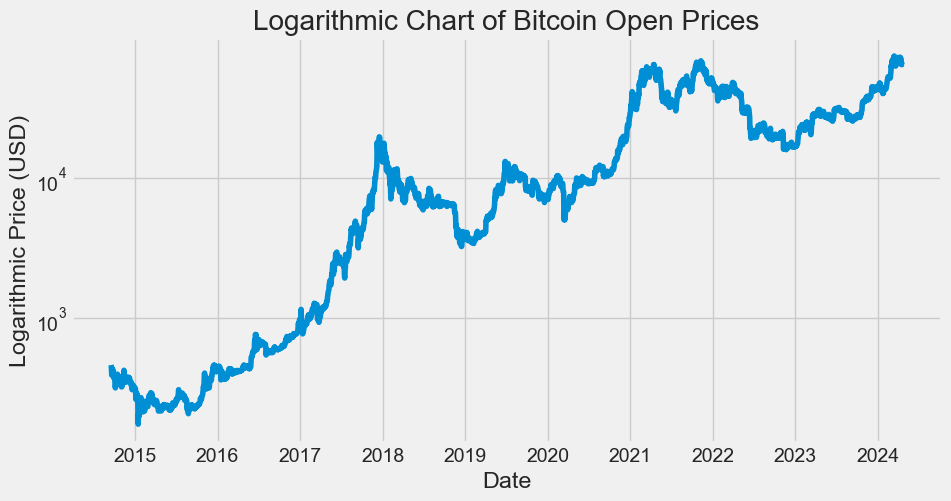

In [41]:
# Logarithmic chart based on opening price
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(btc_data['Open'])
plt.yscale('log')  # Set the scale of the y-axis to logarithmic
plt.title('Logarithmic Chart of Bitcoin Open Prices')
plt.xlabel('Date')
plt.ylabel('Logarithmic Price (USD)')
plt.grid(True)
plt.show()

Average opening price: 15,836

Highest opening price: 73,079

Lowest opening price: 176

Outliers in opening price: 40

The Logarithmic chart shows an uptrend pattern that are more easier to spot pattern. and the pattern looks like following a regression pattern

## Closing price BTC

In [38]:
# a. Check for average closing price
print("a. Average closing price:", btc_data['Close'].mean())

# b. Check for highest closing price
print("b. Highest closing price:", btc_data['Close'].max())

# c. Check for lowest closing price
print("c. Lowest closing price:", btc_data['Close'].min())

# d. Check for outliers in the closing price
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = btc_data['Close'].quantile(0.25)
Q3 = btc_data['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = btc_data[(btc_data['Close'] < lower_bound) | (btc_data['Close'] > upper_bound)]['Close']

print("d. Outliers in closing price:")
# Check if any outliers are found
if len(outliers) == 0:
    print("   No outliers found.")
else:
    # Print the count of outliers
    print(outliers.count())

a. Average closing price: 15852.258150154643
b. Highest closing price: 73083.5
c. Lowest closing price: 178.10299682617188
d. Outliers in closing price:
40


e. Histogram of closing price over time:


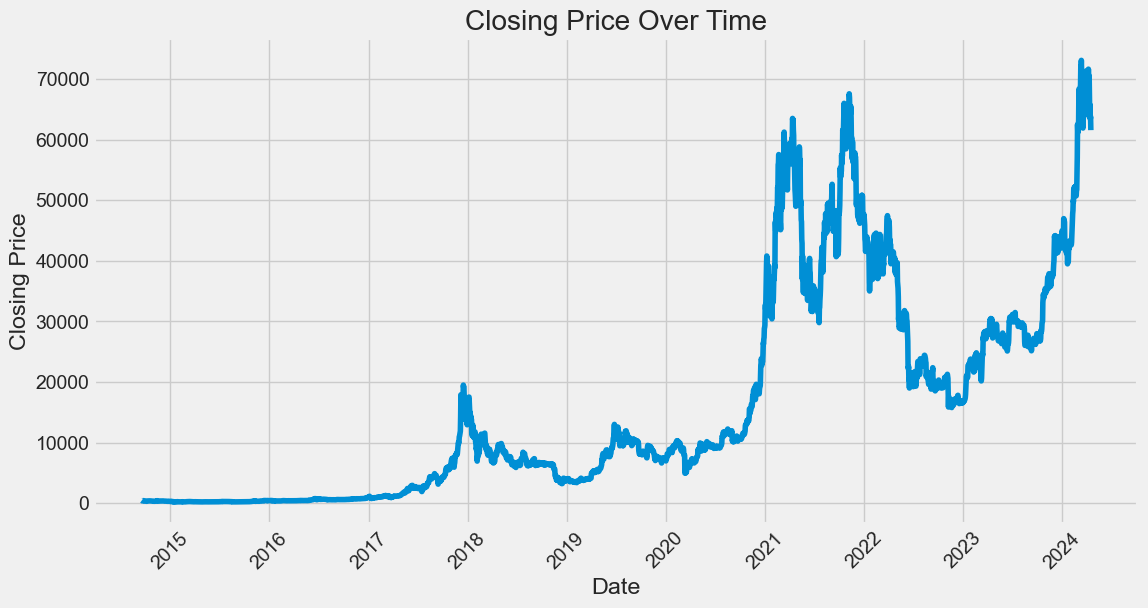

In [39]:
# e. Histogram of closing price over time
print("e. Histogram of closing price over time:")

# Create a line plot of closing price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=btc_data)

# Add title and labels to the plot
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

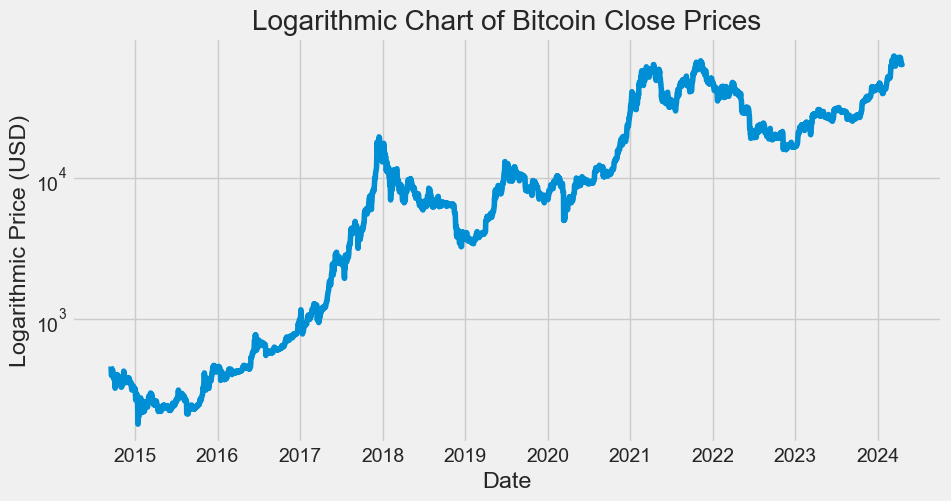

In [40]:
# Logarithmic chart based on opening price
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(btc_data['Close'])
plt.yscale('log')  # Set the scale of the y-axis to logarithmic
plt.title('Logarithmic Chart of Bitcoin Close Prices')
plt.xlabel('Date')
plt.ylabel('Logarithmic Price (USD)')
plt.grid(True)
plt.show()

Average closing price: 15,852

Highest closing price: 73,083

Lowest closing price: 178

Outliers in closing price: 40

The Logarithmic chart shows an uptrend pattern that are more easier to spot pattern. and the pattern looks like following a regression pattern

## Volume

In [42]:
# a. Check for average volume
print("a. Average volume:", btc_data['Volume'].mean())

# b. Check for highest volume
print("b. Highest volume:", btc_data['Volume'].max())

# c. Check for lowest volume
print("c. Lowest volume:", btc_data['Volume'].min())

# d. Check for outliers in the volume
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = btc_data['Volume'].quantile(0.25)
Q3 = btc_data['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = btc_data[(btc_data['Volume'] < lower_bound) | (btc_data['Volume'] > upper_bound)]['Volume']

# Print message about outliers in volume
print("d. Outliers in volume:")
# Check if any outliers are found
if len(outliers) == 0:
    print("   No outliers found.")
else:
    # Print the count of outliers
    print(outliers.count())

a. Average volume: 17109317818.701513
b. Highest volume: 350967941479
c. Lowest volume: 5914570
d. Outliers in volume:
60


e. Histogram of volume over time:


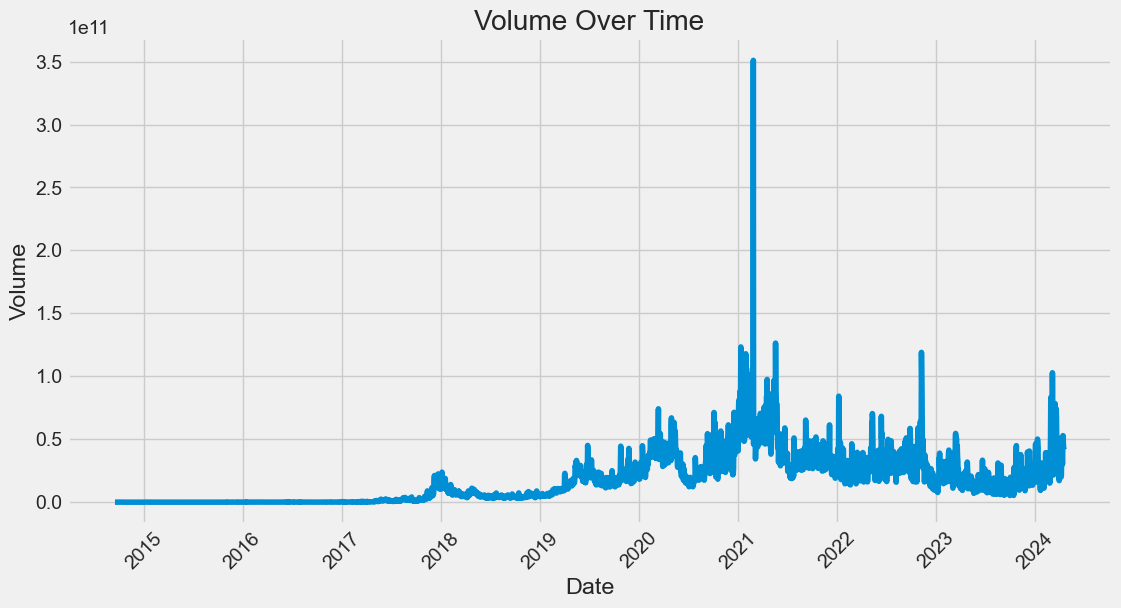

In [43]:
# e. Histogram of volume over time
print("e. Histogram of volume over time:")

# Create a line plot of volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=btc_data)

# Add title and labels to the plot
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

There is a wiggling in the volume but it have seen some high jump in it

## Bivariate Analysis & Visualizations

In [45]:
# 1. Correlation between opening and closing prices
# Calculate the correlation coefficient between opening and closing prices
correlation_open_close = btc_data['Open'].corr(btc_data['Close'])

# Print the correlation coefficient
print("1. Correlation between opening and closing prices:", correlation_open_close)

1. Correlation between opening and closing prices: 0.9988558279142403


A robust positive correlation exists between the opening and closing prices, with a correlation coefficient of 0.99.

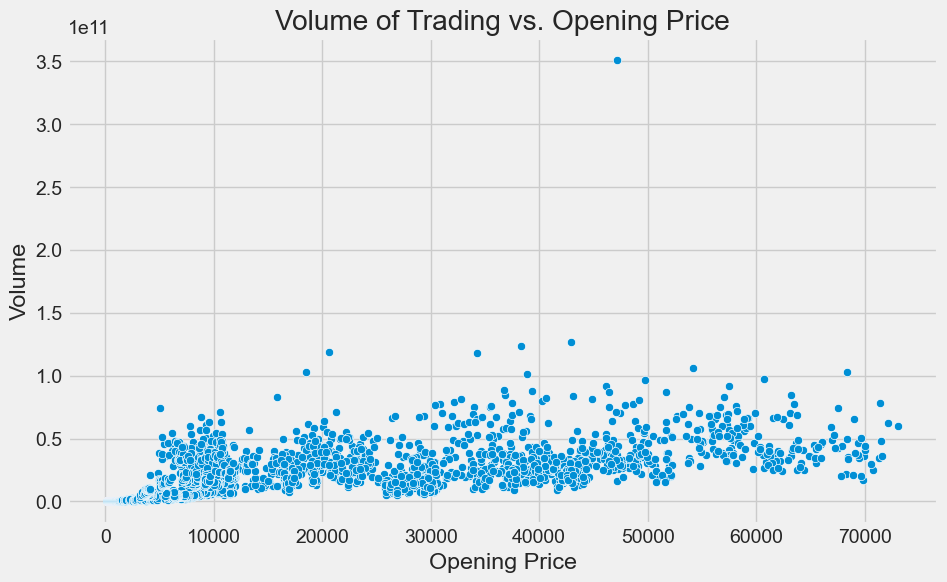

In [46]:
# 2. Volume of trading vs. changes in opening price
# Create a scatter plot to visualize the relationship between volume of trading and opening price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Volume', data=btc_data)

# Add title and labels to the plot
plt.title('Volume of Trading vs. Opening Price')
plt.xlabel('Opening Price')
plt.ylabel('Volume')

# Display the plot
plt.show()

There is a negative correlation observed between trading volume and opening price. Specifically, as the opening price increases, the trading volume tends to decrease.

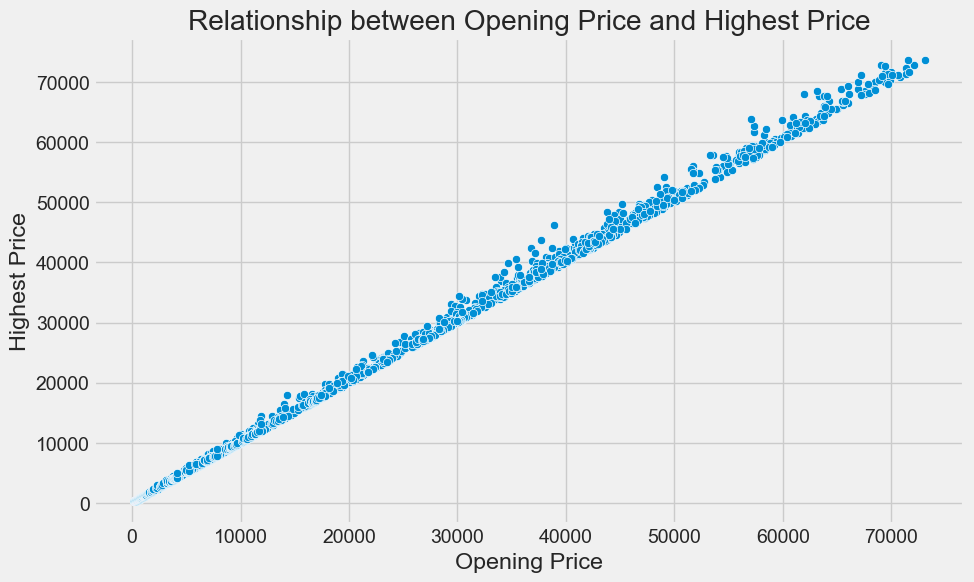

In [47]:
# 3. Relationship between opening price and highest price
# Create a scatter plot to visualize the relationship between opening price and highest price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='High', data=btc_data)

# Add title and labels to the plot
plt.title('Relationship between Opening Price and Highest Price')
plt.xlabel('Opening Price')
plt.ylabel('Highest Price')

# Display the plot
plt.show()

There is a significant positive correlation observed between the opening price and the highest price, suggesting that as the opening price increases, the highest price tends to increase as well.

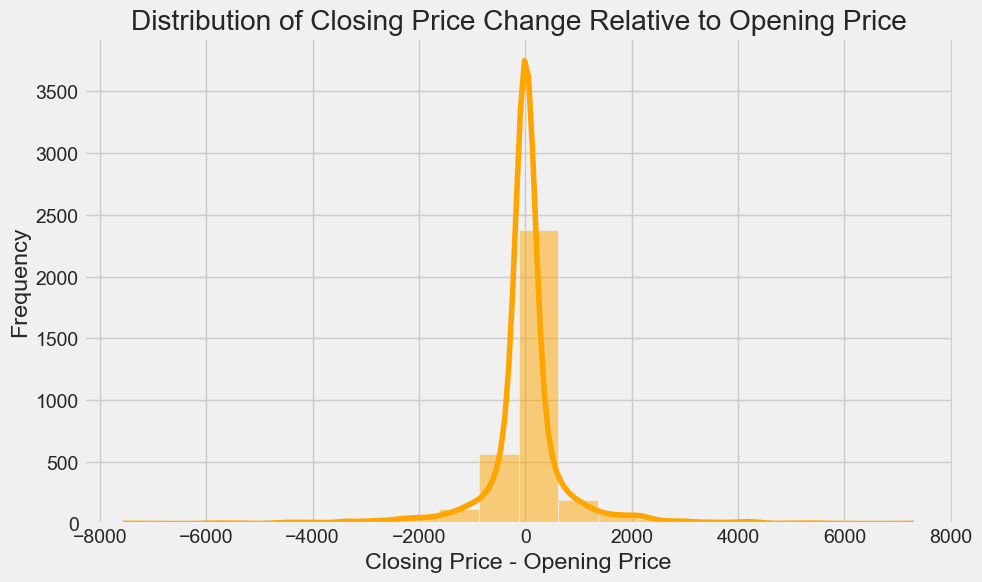

In [50]:
# 4. Closing price change relative to opening price
# Calculate the difference between closing price and opening price
btc_data['Close - Open'] = btc_data['Close'] - btc_data['Open']

# Create a histogram to visualize the distribution of closing price change relative to opening price
plt.figure(figsize=(10, 6))
sns.histplot(btc_data['Close - Open'], bins=20, kde=True, color='orange')

# Add title and labels to the plot
plt.title('Distribution of Closing Price Change Relative to Opening Price')
plt.xlabel('Closing Price - Opening Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

The relationship between the opening and closing prices appears to be symmetric, This symmetry suggests a balanced market behavior between opening and closing prices.

In [51]:
# 5. Correlation between trading volume and closing price
# Calculate the correlation coefficient between trading volume and closing price
correlation_volume_close = btc_data['Volume'].corr(btc_data['Close'])

# Print the correlation coefficient
print("5. Correlation between trading volume and closing price:", correlation_volume_close)

5. Correlation between trading volume and closing price: 0.674310657884749


In [ ]:
There is a slight negative correlation observed between the trading volume and the closing price, with a correlation coefficient of approximately -0.03.

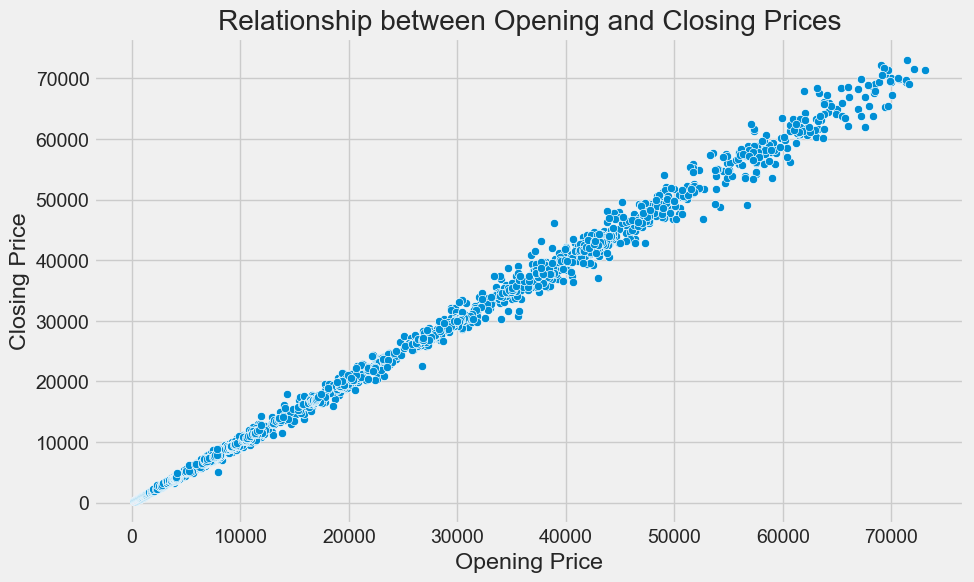

In [52]:
# 6. Relationship between opening and closing prices
# Create a scatter plot to visualize the relationship between opening and closing prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=btc_data)

# Add title and labels to the plot
plt.title('Relationship between Opening and Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')

# Display the plot
plt.show()

In [ ]:
There is a strong positive correlation between the opening and closing prices, This suggests a consistent trend where prices typically close higher than their opening values.

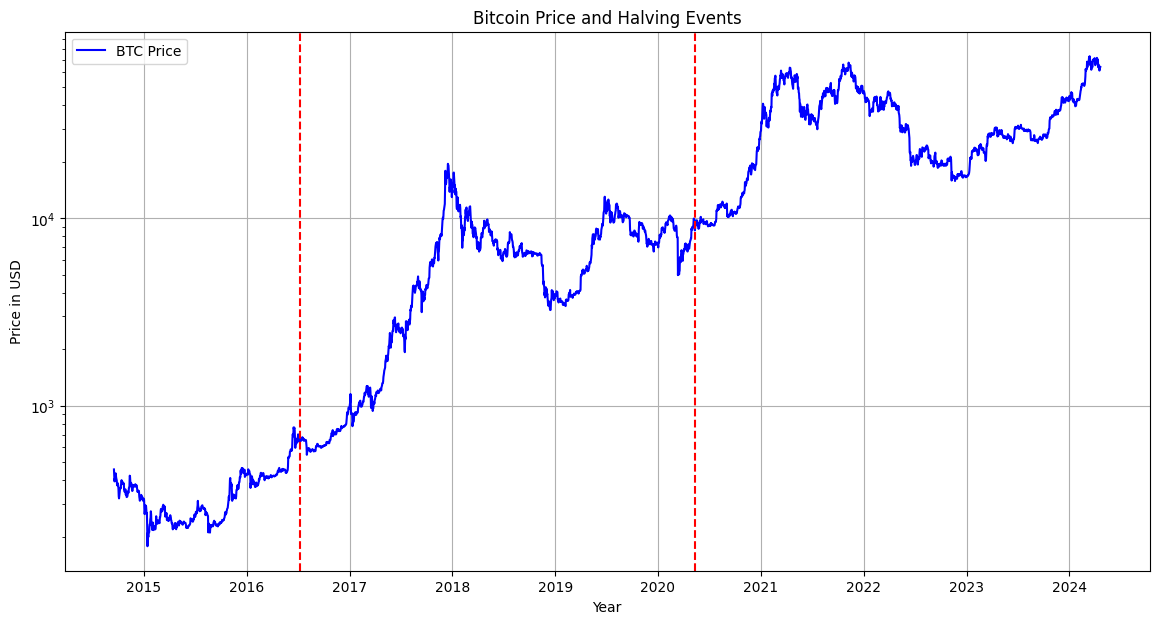

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
#btc hALVING EFFECT

# Define the Bitcoin ticker symbol and the time period to download the data
btc = yf.Ticker("BTC-USD")

# Download historical data for Bitcoin
btc_data = btc.history(period="max")

# Define Bitcoin halving dates
halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11']

# Plotting the Bitcoin prices
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC Price', color='blue')
plt.title('Bitcoin Price and Halving Events')
plt.xlabel('Year')
plt.ylabel('Price in USD')
plt.yscale('log')

# Mark the halving events
for date in halving_dates:
    if date in btc_data.index:
        plt.axvline(x=pd.to_datetime(date), color='r', linestyle='--', label='Halving Event' if date == '2012-11-28' else "")

plt.legend()
plt.grid(True)
plt.show()


The halving in btc shows that the price goes down momneterali, then always follow by price goes up

# EDA Conclusion

Opening Price Insights:

The average opening price of Bitcoin during the analyzed period stands at $15k, with the highest recorded opening price reaching $73k and the lowest at $5k. No outliers were detected in the opening price column.
Notably, since the beginning of 2021, there has been a significant surge in the opening price, with an increase of over $4,000 and a continued upward trend.
Closing Price Insights:

Similarly, the average closing price of Bitcoin is $15k, with the highest recorded closing price at $73k. Like the opening price, no outliers were identified in the closing price column.
From the onset of 2021, there has been a substantial surge in the closing price, exceeding $4,000, and displaying a continuous upward trajectory.
Volume Insights:

The average trading volume during the period is approximately 45.03, with the highest volume recorded at 303.81 and the lowest at 11.46. However, there are 45 outliers detected in the volume column.
While there is a noticeable fluctuation in volume, there are instances of significant spikes indicating heightened activity in trading.
Correlation Analysis:

A robust positive correlation of 0.99 exists between the opening and closing prices, suggesting a strong relationship where prices tend to close higher than their opening values.
Conversely, a negative correlation is observed between trading volume and opening price, indicating that as the opening price increases, the trading volume tends to decrease.
Moreover, a significant positive correlation between the opening price and the highest price is evident, indicating a tendency for both prices to increase together.
The relationship between opening and closing prices appears to be symmetric, suggesting a balanced market behavior between these two metrics.
Additionally, a slight negative correlation is observed between trading volume and closing price, indicating a subtle trend where higher trading volumes may coincide with lower closing prices.